In [1]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from requests import get
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000); 
pd.set_option('display.max_rows', 1000); 
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Miscellaneous/df1000_extracted.xlsx")
#Creating a copy
df_copy = df

In [4]:
#Dropping all the columns which were dropped in feature reduction
#Dropping categorical features 
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('url', axis = 1, inplace = True)
df.drop('type', axis = 1, inplace = True)
df.drop('domain', axis = 1, inplace = True)
df.drop('ip_address', axis = 1, inplace = True)
df.drop('city', axis = 1, inplace = True)
df.drop('country', axis = 1, inplace = True)
df.drop('expiration_date', axis = 1, inplace = True)
df.drop('creation_date', axis = 1, inplace = True)
#Dropping features with low variance
df.drop('count_@', axis = 1, inplace = True)
df.drop('count_#', axis = 1, inplace = True)
df.drop('count_+', axis = 1, inplace = True)
df.drop('count_$', axis = 1, inplace = True)
df.drop('count_!', axis = 1, inplace = True)
df.drop('count_*', axis = 1, inplace = True)
df.drop('count_,', axis = 1, inplace = True)
df.drop('https', axis = 1, inplace = True)
df.drop('has_ip_address', axis = 1, inplace = True)
df.drop('num_embed', axis = 1, inplace = True)
df.drop('num_object', axis = 1, inplace = True)
#Dropping highly correlated features
df.drop('count_alphas', axis = 1, inplace = True)
df.drop('num_htmltags', axis = 1, inplace = True)
df.drop('abnormal_url', axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   label               1009 non-null   int64
 1   url_len             1009 non-null   int64
 2   count_?             1009 non-null   int64
 3   count_-             1009 non-null   int64
 4   count_=             1009 non-null   int64
 5   count_.             1009 non-null   int64
 6   count_%             1009 non-null   int64
 7   count_//            1009 non-null   int64
 8   count_digits        1009 non-null   int64
 9   count_puncs         1009 non-null   int64
 10  count_www           1009 non-null   int64
 11  Shortening_Service  1009 non-null   int64
 12  age                 1009 non-null   int64
 13  intended_life       1009 non-null   int64
 14  life_remaining      1009 non-null   int64
 15  status              1009 non-null   int64
 16  num_hyperlinks      1009 non-null   int64


In [6]:
#Scaling the data into 0-1
X = df.drop(['label'], axis=1)
y = df['label']
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X

array([[0.28985507, 0.33333333, 0.        , ..., 0.00061312, 0.        ,
        0.02758621],
       [0.04710145, 0.        , 0.        , ..., 0.00183936, 0.        ,
        0.02068966],
       [0.52898551, 0.        , 0.13636364, ..., 0.01001431, 0.        ,
        0.20689655],
       ...,
       [0.30434783, 0.33333333, 0.        , ..., 0.00081749, 0.        ,
        0.05517241],
       [0.08695652, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07608696, 0.        , 0.        , ..., 0.00143062, 0.01754386,
        0.03448276]])

In [7]:
#Splitting the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [8]:
#Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE 
#current class distribution
print(Counter(y_train))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X_train, y_train = sm.fit_resample(X_train, y_train)
# summarize class distribution after oversampling
print(Counter(y_train))

Counter({1: 455, 0: 251})
Counter({0: 455, 1: 455})


0.9274725274725275
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        98
           1       0.98      0.93      0.96       205

    accuracy                           0.94       303
   macro avg       0.93      0.95      0.94       303
weighted avg       0.95      0.94      0.94       303

Area Under the Curve 0.9505475360876057
Confusion Matrix : 
[[ 95   3]
 [ 14 191]]


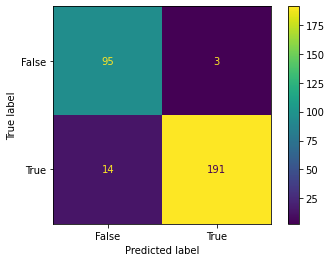

Feature: 0, Score: -0.01305
Feature: 1, Score: 0.66669
Feature: 2, Score: 0.25368
Feature: 3, Score: -0.63514
Feature: 4, Score: -2.11340
Feature: 5, Score: -1.78059
Feature: 6, Score: 7.76719
Feature: 7, Score: -2.03647
Feature: 8, Score: -1.48880
Feature: 9, Score: 4.48923
Feature: 10, Score: -1.31767
Feature: 11, Score: -1.14614
Feature: 12, Score: -0.90970
Feature: 13, Score: 0.74981
Feature: 14, Score: -1.23852
Feature: 15, Score: -0.27075
Feature: 16, Score: -0.12833
Feature: 17, Score: 1.06846


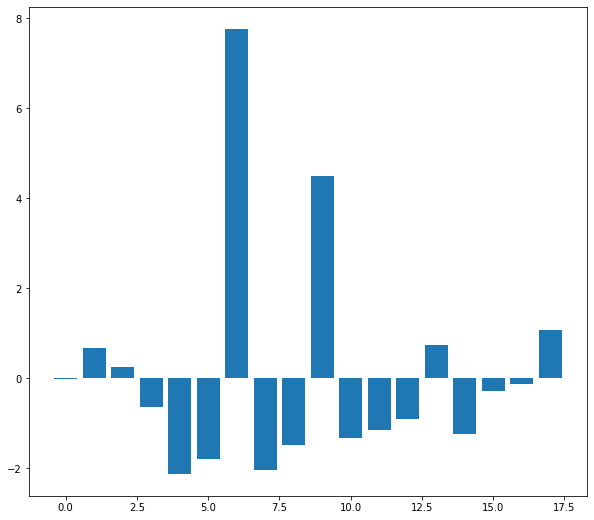

In [9]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,9))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

0.9032967032967033
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        98
           1       0.95      0.94      0.94       205

    accuracy                           0.92       303
   macro avg       0.91      0.92      0.91       303
weighted avg       0.92      0.92      0.92       303

Area Under the Curve 0.9172722747635639
Confusion Matrix : 
[[ 88  10]
 [ 13 192]]


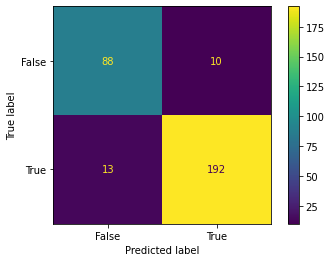

Feature: 0, Score: 0.07144
Feature: 1, Score: 0.02090
Feature: 2, Score: 0.00337
Feature: 3, Score: 0.04392
Feature: 4, Score: 0.14033
Feature: 5, Score: 0.00122
Feature: 6, Score: 0.28797
Feature: 7, Score: 0.01252
Feature: 8, Score: 0.12981
Feature: 9, Score: 0.18926
Feature: 10, Score: 0.04009
Feature: 11, Score: 0.01226
Feature: 12, Score: 0.02496
Feature: 13, Score: 0.00113
Feature: 14, Score: 0.00044
Feature: 15, Score: 0.01803
Feature: 16, Score: 0.00057
Feature: 17, Score: 0.00178


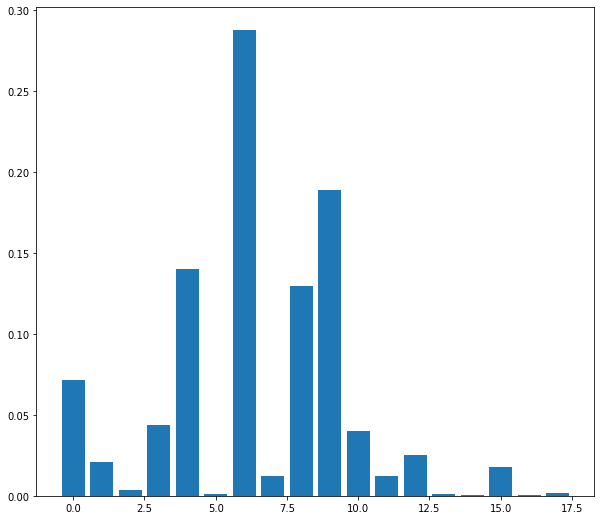

In [10]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(max_depth=2, random_state=0)
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_rf = rf.predict(X_test)
clf_report = classification_report(y_test, y_pred_rf)
print(f"Classification Report : \n{clf_report}")
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_rf)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,9))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

1.0
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        98
           1       1.00      0.98      0.99       205

    accuracy                           0.98       303
   macro avg       0.98      0.99      0.98       303
weighted avg       0.98      0.98      0.98       303

Area Under the Curve 0.9878048780487805
Confusion Matrix : 
[[ 98   0]
 [  5 200]]


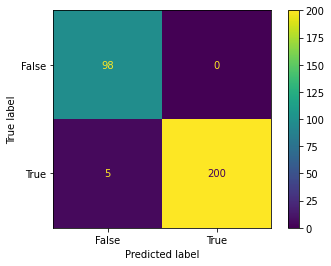

Feature: 0, Score: 0.03014
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01453
Feature: 3, Score: 0.04110
Feature: 4, Score: 0.12061
Feature: 5, Score: 0.03341
Feature: 6, Score: 0.68086
Feature: 7, Score: 0.00484
Feature: 8, Score: 0.06144
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00923
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00384
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000


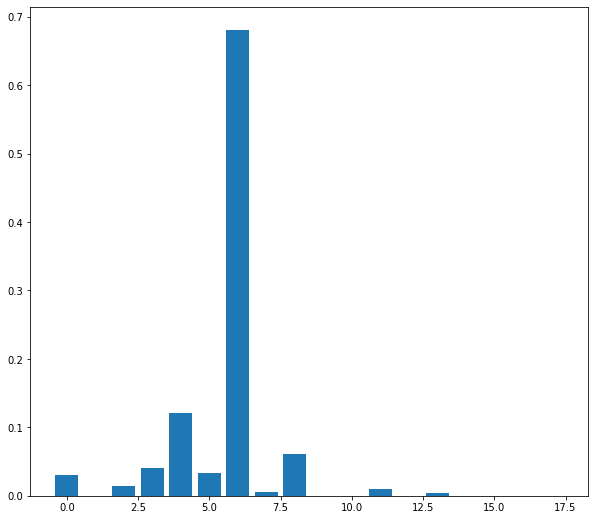

In [11]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
# fiting the model to data
dtree.fit(X_train,y_train)
print(dtree.score(X_train,y_train))
# get predictions
y_pred_dtree = dtree.predict(X_test)
#Import scikit-learn metrics module for clasification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_dtree))
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_dtree)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dtree)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
# get importance
importance = dtree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,9))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


1.0
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      1.00      1.00       205

    accuracy                           1.00       303
   macro avg       0.99      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303

Area Under the Curve 0.9975609756097561
Confusion Matrix : 
[[ 98   0]
 [  1 204]]


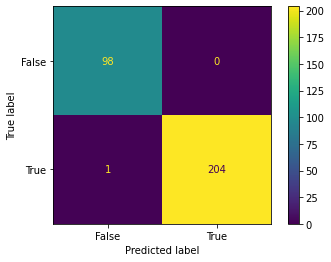

Feature: 0, Score: 0.01972
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00904
Feature: 3, Score: 0.09448
Feature: 4, Score: 0.11414
Feature: 5, Score: 0.15939
Feature: 6, Score: 0.45322
Feature: 7, Score: 0.00394
Feature: 8, Score: 0.04029
Feature: 9, Score: 0.06251
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00483
Feature: 12, Score: 0.00829
Feature: 13, Score: 0.00654
Feature: 14, Score: 0.01898
Feature: 15, Score: 0.00047
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00417


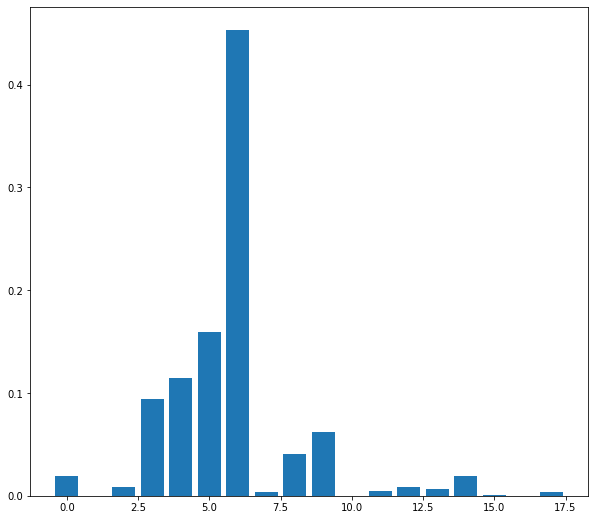

In [20]:
# XGBOOST
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score
xgb_model = xgb.XGBClassifier()
# fiting the model to data
xgb_model.fit(X_train, y_train, eval_metric='rmse')
print(xgb_model.score(X_train,y_train))
# get predictions
y_pred_boost = xgb_model.predict(X_test)
#Import scikit-learn metrics module for clasification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_boost))
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_boost)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_boost)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
# get importance
importance = xgb_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,9))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

-453.52215867436917
              precision    recall  f1-score   support

           0       0.27      0.53      0.36        98
           1       0.59      0.32      0.42       205

    accuracy                           0.39       303
   macro avg       0.43      0.43      0.39       303
weighted avg       0.49      0.39      0.40       303

Area Under the Curve 0.4262817322050771
Confusion Matrix : 
[[ 52  46]
 [139  66]]


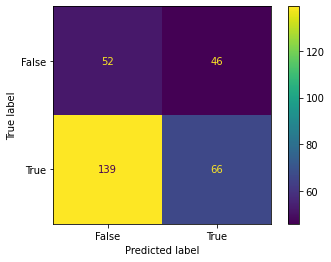

In [18]:
# K-MEANS CLUSTERING
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 2)
# fiting the model to data
km.fit(X_train,y_train)
print(km.score(X_train,y_train))
# get predictions
y_pred_km = km.predict(X_test)
#Import scikit-learn metrics module for clasification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_km))
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_km)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_km)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9637362637362638
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        98
           1       0.98      0.94      0.96       205

    accuracy                           0.95       303
   macro avg       0.93      0.95      0.94       303
weighted avg       0.95      0.95      0.95       303

Area Under the Curve 0.950323544051767
Confusion Matrix : 
[[ 94   4]
 [ 12 193]]


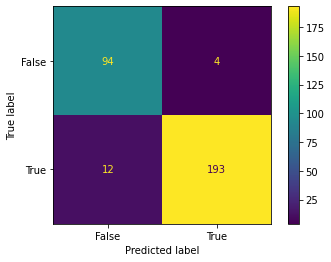

In [14]:
# NEURAL NETWORK
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
# fiting the model to data
mlp.fit(X_train,y_train)
print(mlp.score(X_train,y_train))
# get predictions
y_pred_mlp = mlp.predict(X_test)
#Import scikit-learn metrics module for clasification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_mlp))
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_mlp)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mlp)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

0.8527472527472527
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        98
           1       0.98      0.78      0.87       205

    accuracy                           0.84       303
   macro avg       0.83      0.87      0.83       303
weighted avg       0.88      0.84      0.84       303

Area Under the Curve 0.872498755599801
Confusion Matrix : 
[[ 95   3]
 [ 46 159]]


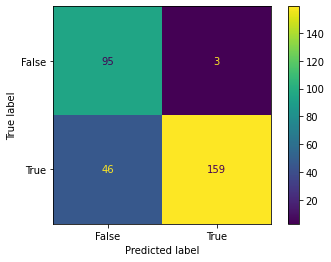

In [15]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# fiting the model to data
gnb.fit(X_train, y_train)
print(gnb.score(X_train,y_train))
# get predictions
y_pred_gnb = gnb.predict(X_test)
#Import scikit-learn metrics module for clasification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_gnb))
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_gnb)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gnb)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [16]:
#Converting the XGBoost Model into a pickle file so that it can be used in the application
import pickle
import json
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

#model_json = json.dumps(model.to_dict())

In [17]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


0.9967032967032967
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        98
           1       0.98      0.99      0.99       205

    accuracy                           0.98       303
   macro avg       0.98      0.97      0.98       303
weighted avg       0.98      0.98      0.98       303

Area Under the Curve 0.974713787954206
Confusion Matrix : 
[[ 94   4]
 [  2 203]]


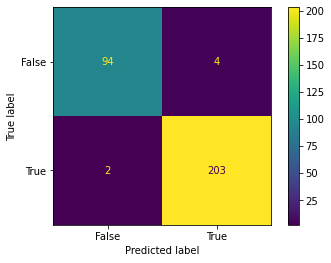

Feature: 0, Score: 0.00710
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01695
Feature: 3, Score: 0.01385
Feature: 4, Score: 0.11923
Feature: 5, Score: 0.02883
Feature: 6, Score: 0.38137
Feature: 7, Score: 0.01227
Feature: 8, Score: 0.08362
Feature: 9, Score: 0.21672
Feature: 10, Score: 0.04101
Feature: 11, Score: 0.01645
Feature: 12, Score: 0.00845
Feature: 13, Score: 0.00630
Feature: 14, Score: 0.02637
Feature: 15, Score: 0.00576
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.01571


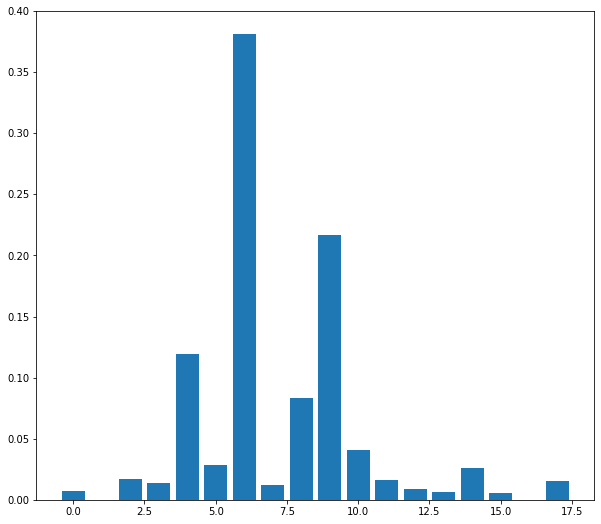

In [21]:
# XGBOOST with hyperparameter tuning
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# fiting the model to data
xgb_model.fit(X_train, y_train, eval_metric='rmse')
print(xgb_model.score(X_train,y_train))
# get predictions
y_pred_boost = xgb_model.predict(X_test)
#Import scikit-learn metrics module for clasification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_boost))
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_boost)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_boost)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
# get importance
importance = xgb_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,9))
plt.bar([x for x in range(len(importance))], importance)
plt.show()